## Data Visualisation

This file displays the catalog information from the GZ1 dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
catalog = pd.read_csv('../../Data/gz1_desi_cross_cat_cut.csv')
orig_catalog = pd.read_csv('../../Data/gz1_desi_cross_cat.csv')
catalog['P_OTHER'] = catalog['P_EL']+catalog['P_EDGE']+catalog['P_DK']+catalog['P_MG']
orig_catalog['P_OTHER'] = orig_catalog['P_EL']+orig_catalog['P_EDGE']+orig_catalog['P_DK']+orig_catalog['P_MG']

In [3]:
THRESHOLD = 0.5

def get_metrics(catalog, cat_name):
    print(f"\nNumber of galaxies in {cat_name}: {catalog.shape[0]}")
    very_CW_galaxies = catalog[catalog['P_CW']>THRESHOLD]
    very_ACW_galaxies = catalog[catalog['P_ACW']>THRESHOLD]
    very_OTHER_galaxies = catalog[catalog['P_OTHER']>THRESHOLD]
    print(f"Very CW: {very_CW_galaxies.shape[0]} ({very_CW_galaxies.shape[0]/catalog.shape[0]:%}), Very ACW: {very_ACW_galaxies.shape[0]} ({very_ACW_galaxies.shape[0]/catalog.shape[0]:%}), Very OTHER: {very_OTHER_galaxies.shape[0]} ({very_OTHER_galaxies.shape[0]/catalog.shape[0]:%})")

    largest_prob_class = catalog[['P_CW','P_ACW','P_OTHER']].idxmax(axis=1)
    CW_galaxies = np.count_nonzero(largest_prob_class=='P_CW')
    ACW_galaxies = np.count_nonzero(largest_prob_class=='P_ACW')
    OTHER_galaxies = np.count_nonzero(largest_prob_class=='P_OTHER')
    print(f"CW: {CW_galaxies}, ACW: {ACW_galaxies}, OTHER: {OTHER_galaxies}")



Number of galaxies in GZ1 catalogue: 647837
Very CW: 0.04611036418111346, Very ACW: 0.04887031768793693, Very EL: 0.8968058323312809

Number of galaxies in cut GZ1 catalogue: 208682
Very CW: 0.03835021707670044, Very ACW: 0.04096663823425116, Very EL: 0.913068688243356


CW: 8499, ACW: 9001, OTHER: 191182


## Number of votes per object

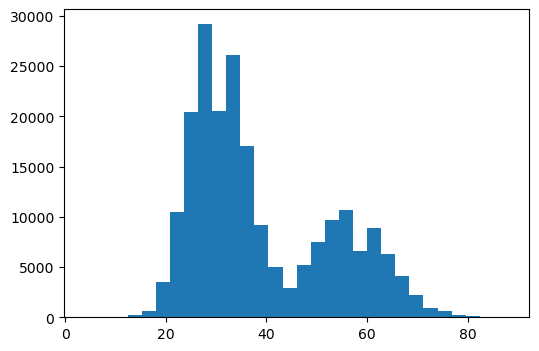

In [4]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot() 
ax.hist(catalog['NVOTE'],bins=30)
plt.show()

## Probabilities for galaxy types

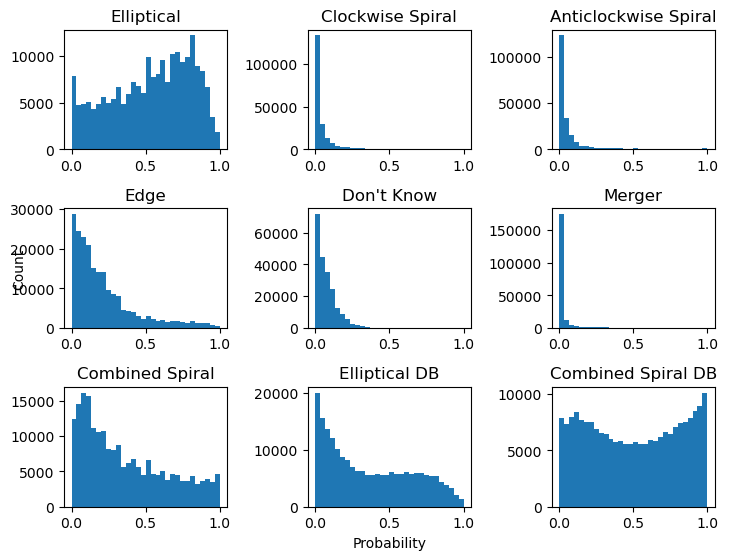

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlabel("Probability")
ax.set_ylabel("Count")
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

labels = ["Elliptical","Clockwise Spiral","Anticlockwise Spiral","Edge","Don't Know","Merger","Combined Spiral","Elliptical DB","Combined Spiral DB"]
for i, votetype in enumerate(catalog.columns.values[5:14]):
    ax_i = fig.add_subplot(3,3,i+1)
    ax_i.hist(catalog[votetype],bins=30)
    ax_i.set_title(labels[i])
plt.tight_layout()
plt.show()

In [6]:
very_CW_galaxies = catalog[catalog['P_CW']>0.8]
print(f"Number of very CW galaxies in GZ1 catalogue: {very_CW_galaxies.shape[0]}")

very_ACW_galaxies = catalog[catalog['P_ACW']>0.8]
print(f"Number of very ACW galaxies in GZ1 catalogue: {very_ACW_galaxies.shape[0]}")
very_CW_galaxies.head(10)

very_EL_galaxies = catalog[catalog['P_EL']>0.8]
print(f"Number of very EL galaxies in GZ1 catalogue: {very_EL_galaxies.shape[0]}")
very_CW_galaxies.head(10)

Number of very CW galaxies in GZ1 catalogue: 3472
Number of very ACW galaxies in GZ1 catalogue: 3720
Number of very EL galaxies in GZ1 catalogue: 39696


,Unnamed: 0,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,...,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN,dr8_id,err_r,petroR50_r,petroR50Err_r,P_OTHER
84,85,587727225156141259,00:26:46.21,-10:57:38.8,29,0.000,0.862,0.034,0.069,0.034,...,0.000,0.966,1,0,0,267384_3393,0.010995,3.430839,0.066660,0.103
91,92,587727177915826302,00:30:07.31,-11:06:49.1,33,0.030,0.909,0.000,0.030,0.000,...,0.030,0.939,1,0,0,267387_53,0.001766,12.605386,0.070405,0.090
225,229,587727177910583419,23:41:13.33,-10:59:30.1,65,0.077,0.908,0.000,0.015,0.000,...,0.077,0.923,1,0,0,268755_2373,0.004751,4.690675,0.020881,0.092
368,375,587727178455253203,00:53:46.83,-10:42:58.1,72,0.000,0.986,0.000,0.000,0.000,...,0.000,0.986,1,0,0,268826_2752,0.009762,7.524622,0.072857,0.014
379,386,587727225159483494,00:57:43.02,-10:48:47.5,36,0.000,0.972,0.000,0.000,0.028,...,0.000,0.972,1,0,0,268830_1321,0.010172,2.516854,0.032625,0.028
541,551,587727873697054770,23:47:23.51,-10:46:51.4,33,0.030,0.909,0.061,0.000,0.000,...,0.023,0.977,1,0,0,270177_1698,0.003049,4.959623,0.617584,0.030
570,580,587727178449420392,23:59:18.52,-10:38:49.8,32,0.094,0.812,0.000,0.031,0.031,...,0.027,0.907,1,0,0,270189_4163,0.011407,3.875909,0.055880,0.187
575,586,587727225690259660,00:01:18.04,-10:25:34.1,28,0.036,0.893,0.000,0.036,0.036,...,0.016,0.948,1,0,0,270191_4215,0.008386,4.320648,0.058685,0.108
711,724,587727225162039426,01:21:27.68,-10:37:08.9,52,0.000,0.923,0.038,0.019,0.000,...,0.000,0.981,1,0,0,270270_15,0.003580,8.574737,0.049382,0.038
768,782,587727177923625098,01:42:39.68,-10:28:33.7,35,0.029,0.857,0.057,0.057,0.000,...,0.009,0.991,1,0,0,270291_4267,0.005452,3.696856,0.028658,0.086


In [7]:
import torch
from torcheval.metrics import BinaryAccuracy
metric = BinaryAccuracy()
input = torch.tensor([0, 0, 5, 1])
target = torch.tensor([1, 0, 5, 1])
metric.update(input, target)
print(metric.compute())

tensor(0.5000)
